# Sieć ograniczenia

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from main import test_genetic_algorithm, plot_results, test_differential_algorithm
from data_reader import parse_sndlib_file
from itertools import product


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

## Algorytm genetyczny:

Poniżej przedstawiono wyniki uruchomienia algorytmu genetycznego dla 50 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 30 generacji.

8250


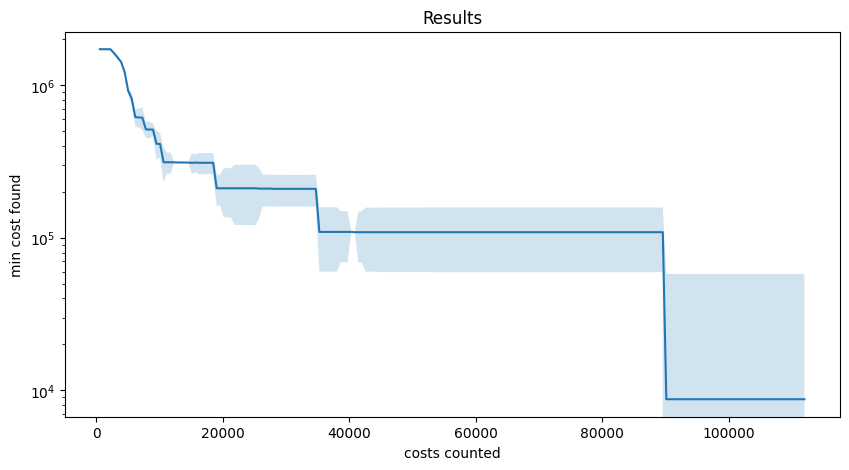

In [ ]:
results, costs_counter = test_genetic_algorithm(data, n_generations=200)

medians = np.median(results, axis=0)
stds = np.std(results, axis=0)

print(np.min(results))

plt.figure(figsize=(10, 5))
plt.plot(costs_counter, medians)

plt.fill_between(
    costs_counter,
    medians - stds,
    medians + stds,
    alpha=0.2,
)

plt.xlabel("costs counted")
plt.ylabel("min cost found")
plt.yscale("log")
plt.title("Results")
plt.show()

### Eksperymenty
Następnie przeprowadzono eksperymenty z różnymi parametrami algorytmu genetycznego.\
Algorytm został wywołany 10 razy dla każdej kombinacji parametrów.

#### Rozmiar populacji
Algorytm został uruchomiony dla rozmiarów populacji: 100, 150 i 200.

In [ ]:
population_sizes = [100, 150, 200, 500]
population_medians, population_stds, costs_counter = [], [], []
for population_size in population_sizes:
    results, cost_counter  = test_genetic_algorithm(data, population_size=population_size, n_generations=250)
    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    population_medians.append(medians)
    population_stds.append(stds)
    costs_counter.append(cost_counter)

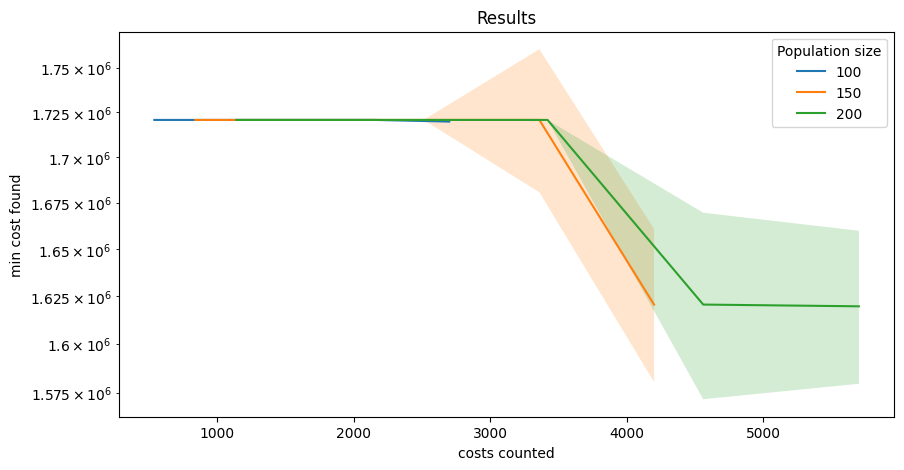

In [ ]:
plot_results('Population size', population_sizes, population_medians, population_stds, costs_counter)


Na wykresie przedstawiono wyniki dla różnych rozmiarów populacji.\
Najlepiej wypadła populacja o rozmiarze 200. W tym przypadku algorytm znalazł minimum (8250) około 45 generacji.\
W przypadku rozmiaru równego 150, algorytm znalazł minimum lokalne (8250) około 60 generacji.\
Dla rozmiaru populacji 100, algorytm czasem znajdował minimum.

#### Rozmiar elity
Algorytm został uruchomiony dla rozmiarów elity: 10, 15 i 20.

In [ ]:
surviors_sizes = [10, 15, 20, 50]
survior_medians, surviors_std, costs_counter = [], [], []
for surviors in surviors_sizes:
    results, cost_counter  = test_genetic_algorithm(data, survivors=surviors, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    survior_medians.append(medians)
    surviors_std.append(stds)
    costs_counter.append(cost_counter)

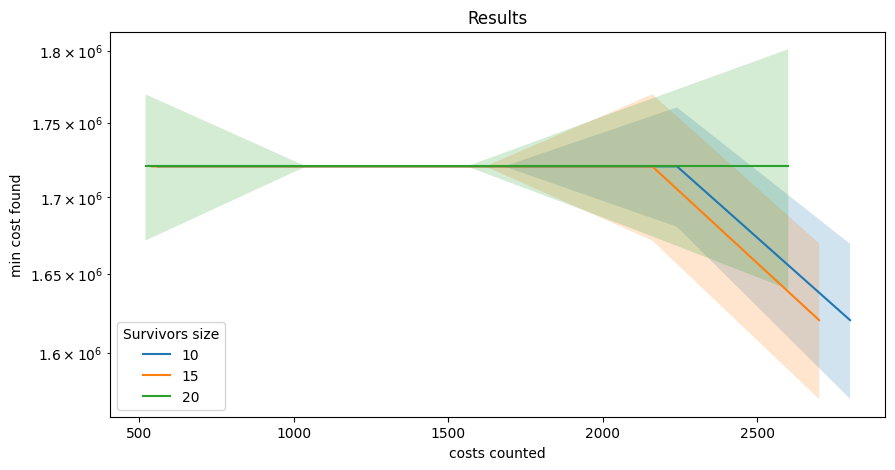

In [ ]:
plot_results('Survivors size', surviors_sizes, survior_medians, surviors_std, costs_counter)

Na wykresie przedstawiono wyniki dla różnych rozmiarów elity.\
Najlepiej wypadły elita o rozmiarze 10 oraz 20. W tym przypadku algorytm znalazł minimum (8250) około 60 generacji.\
Dla rozmiaru elity 15, algorytm znalazł minimum dopiero w 80 generacji.

#### Mutacja
Algorytm został uruchomiony z różnymi mutacjami: normal, aggregation i switch.

Na wykresie przedstawiono wyniki dla różnych rodzajów mutacji.\
Najlepiej wypadła mutacja "normal". W tym przypadku algorytm znalazł minimum (8250) około 80 generacji.\
Dla mutacji "aggregation" i "switch" algorytm nie znalazł minimum.

#### Szansa mutacji
Algorytm został uruchomiony z różnymi szansami mutacji: 0.7, 0.8 i 0.9.

Na wykresie przedstawiono wyniki dla różnych wartości szansy mutacji.\
Najlepiej sprawdziła się szansa równa 0.9. W tym przypadku algorytm znalazł minimum (8250) około 60 generacji.\
Dla wartości 0.7, algorytm zachowywał się mniej przewidywalnie.
Algorytm znalazł minimum dopiero około 100 generacji dla szansy równej 0.8.\

#### Siła mutacji
Algorytm został uruchomiony z różnymi siłami mutacji: 0.7, 0.8 i 0.9.

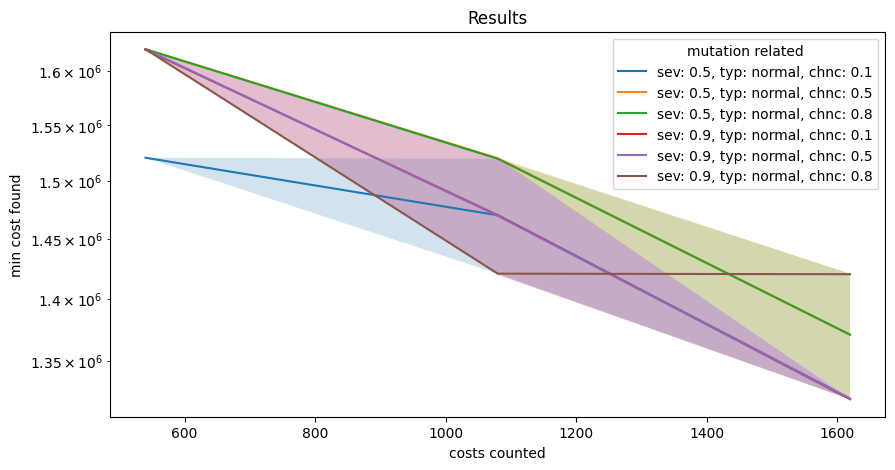

In [ ]:
mutation_severities = [0.5, 0.9]
mutation_types = ["normal"]
mutation_chances = [0.1, 0.5, 0.9]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

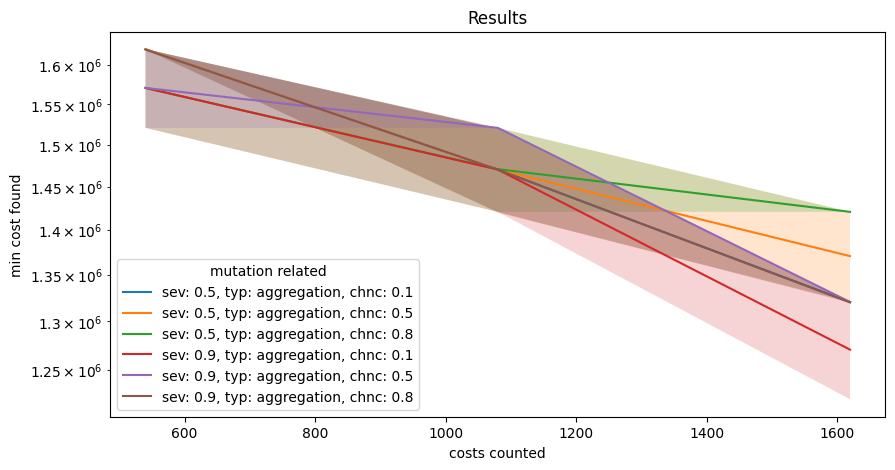

In [ ]:
mutation_severities = [0.5, 0.9]
mutation_types = ["aggregation"]
mutation_chances = [0.1, 0.5, 0.8]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=150)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

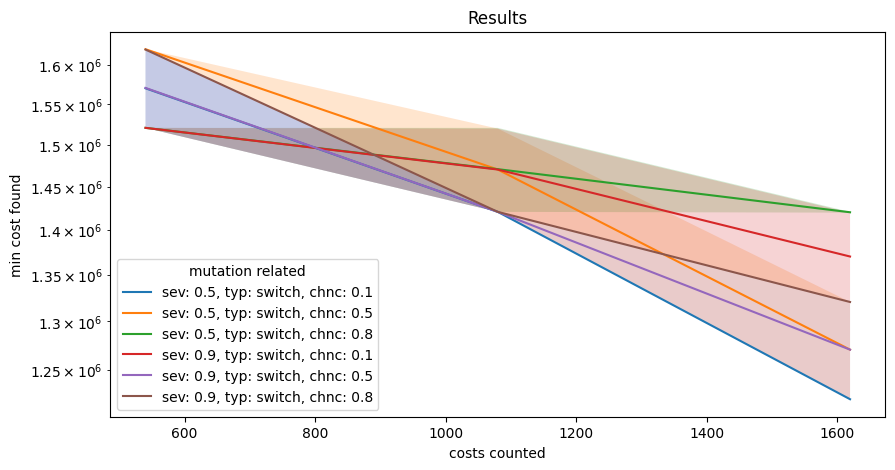

In [ ]:
mutation_severities = [0.5, 0.9]
mutation_types = ["switch"]
mutation_chances = [0.1, 0.5, 0.8]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

Na wykresie przedstawiono wyniki dla różnych sił mutacji.\
Najlepsza okazała się wartość 0.8. W tym przypadku algorytm znalazł minimum (8250) około 65 generacji.\
Dla siły równej 0.7, algorytm znadjdował minimum około 70 generacji.\
Algorytm około 75 generacji znalazł minimum dla wartości 0.1.

#### Krzyżowanie
Algorytm został uruchomiony z krzyżowaniem agregacyjnym i zwykłym.

In [ ]:
aggregate_medians, aggregate_std, costs_counter = [], [], []
for aggregate in [True, False]:
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=aggregate, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    aggregate_medians.append(medians)
    aggregate_std.append(stds)
    costs_counter.append(cost_counter)

KeyboardInterrupt: 

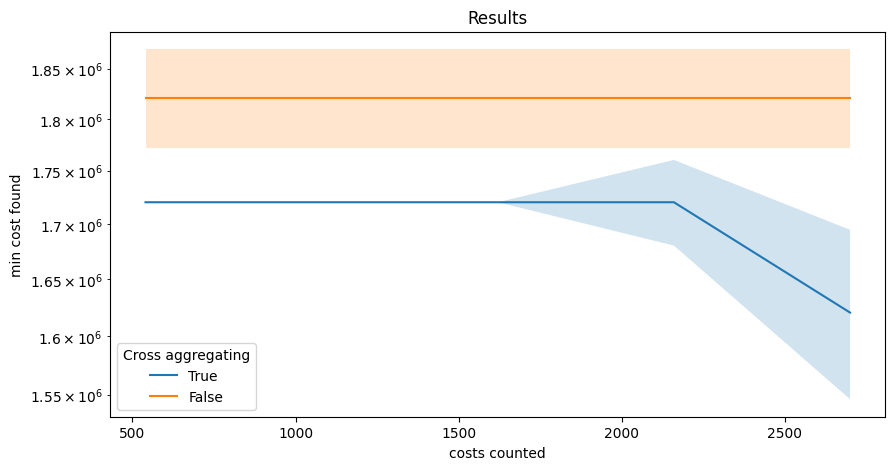

In [ ]:
plot_results('Cross aggregating', [True, False], aggregate_medians, aggregate_std, costs_counter)

Na wykresie przedstawiono wyniki dla dwóch przypadków.\
W przypadku krzyżowania agregacyjnego, algorytm znalazł minimum (8250) około 50 generacji.\
Algorytm bez krzyżowania agregacyjnego nie znalazł minimum.

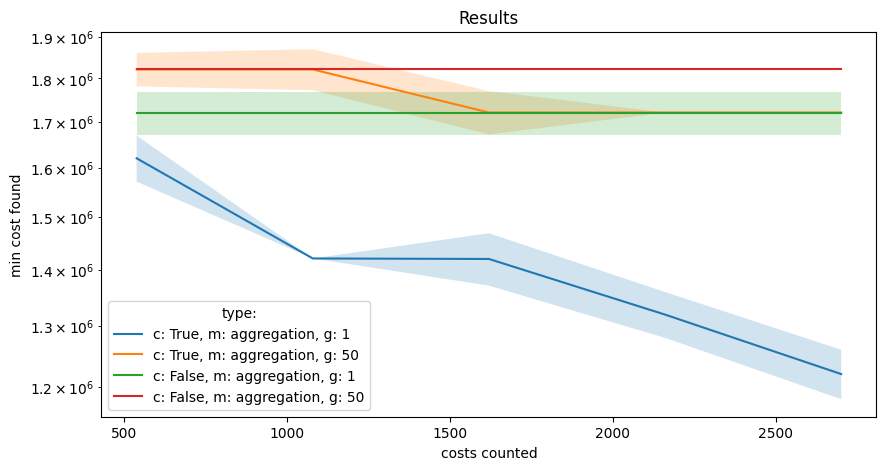

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["aggregation"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


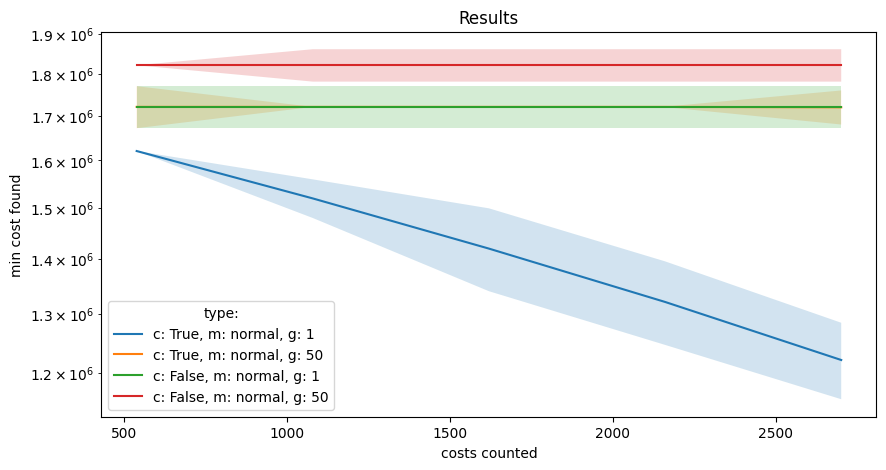

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["normal"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


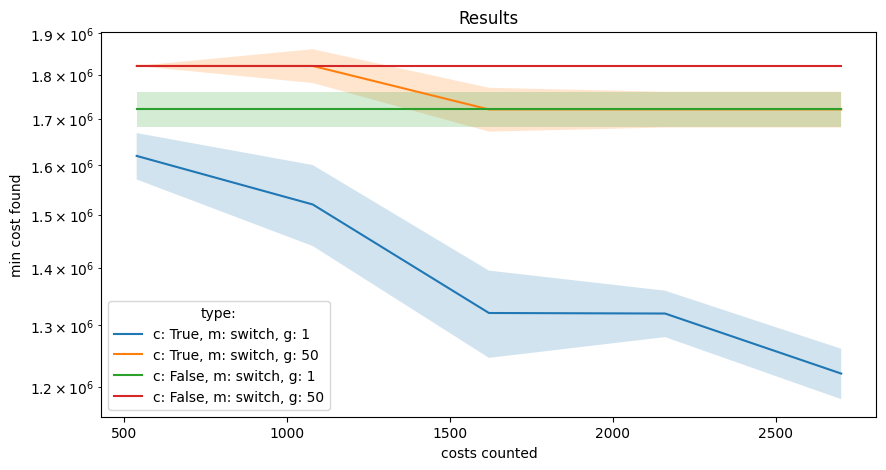

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["switch"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


## Algorytm różnicowy:

Poniżej przedstawiono wyniki uruchomienia algorytmu różnicowego dla 250 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 200 generacji.

8250


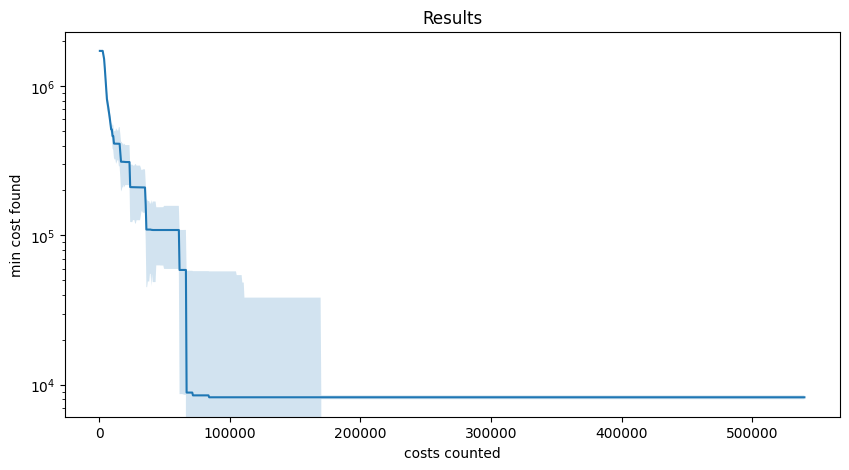

In [ ]:
results, costs_counter = test_genetic_algorithm(data, n_generations=400, n_runs=10)

medians = np.median(results, axis=0)
stds = np.std(results, axis=0)

print(np.min(results))

plt.figure(figsize=(10, 5))
plt.plot(costs_counter, medians)

plt.fill_between(
    costs_counter,
    medians - stds,
    medians + stds,
    alpha=0.2,
)

plt.xlabel("costs counted")
plt.ylabel("min cost found")
plt.yscale("log")
plt.title("Results")
plt.show()

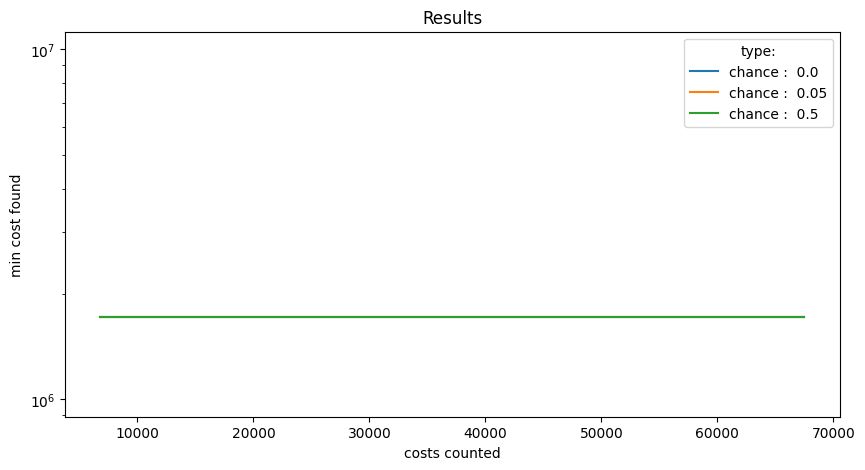

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

mut_aggr_chance = [0.0, 0.05, 0.5]

for chance in mut_aggr_chance:
    a_labels.append(f"chance :  {chance}")
    results, cost_counter  = test_differential_algorithm(data, smoothing_mutation_chance=chance, n_generations=500)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


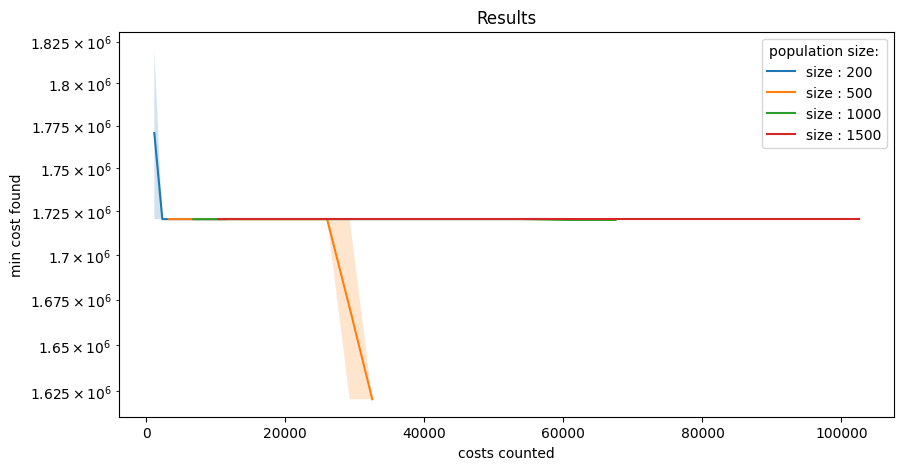

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

population_sizes = [200, 500, 1000, 1500]

for size in population_sizes:
    a_labels.append(f"size : {size}")
    results, cost_counter  = test_differential_algorithm(data, population_size=size, n_generations=500)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('population size:', a_labels, a_medians, a_std, costs_counter)

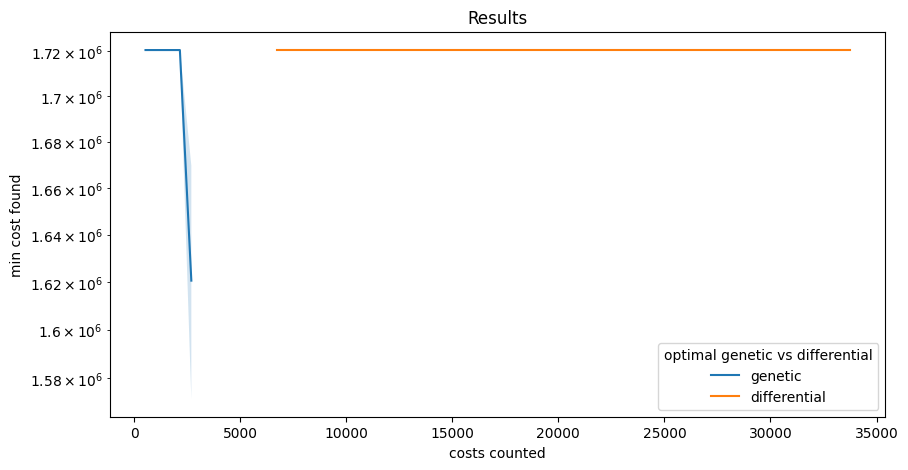

In [ ]:
algorithms = [test_genetic_algorithm, test_differential_algorithm]
a_medians, a_std, costs_counter = [], [], []

for algorithm in algorithms:
    results, cost_counter  = algorithm(data, n_generations=500)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('optimal genetic vs differential', ["genetic", "differential"], a_medians, a_std, costs_counter)